In [45]:
#(1 pt) Import the pandas library and alias it as pd.
import pandas as pd
from google.colab import drive # import package
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [46]:
#(1 pt) Load the file ‘fl_business.csv’ into a Pandas DataFrame named df.
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fl_business.csv')

<ipython-input-46-6d5ac4db836d>:2: DtypeWarning: Columns (12,45,46,47,48,49,50,51,52,83,86) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/fl_business.csv')


# Lab *1a*

In [47]:
# Display basic information
df2.info()
print(df2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21907 entries, 0 to 21906
Columns: 104 entries, business_id to state
dtypes: float64(5), int64(2), object(97)
memory usage: 17.4+ MB
              business_id                                         categories  \
0  oaepsyvc0J17qwi8cfrOWg                         Beauty & Spas, Hair Salons   
1  SFqFFIA4Ks2oHfgEANoRlw  Tapas Bars, Restaurants, American (New), Food,...   
2  2PxZ-fICnd432NJHefXrcA                          Hotels & Travel, Airports   
3  SrsebLQ5lVehQXJp8OcBUg  Asian Fusion, American (New), Restaurants, Sus...   
4  MUeUyqhMja-nnmvgP4rBBg  Hotels, Vacation Rentals, Hotels & Travel, Eve...   

          city                                            address  is_open  \
0  Orange City                                 2566 Enterprise Rd        1   
1      Orlando                              8625 International Dr        1   
2      Orlando                                  1 Jeff Fuqua Blvd        1   
3      Orlando  Universa

KeyError: 'attributes_RestaurantsCounterService'

In [36]:
# Handling Missing Data
print("Missing values per column:\n", df2.isnull().sum())




Missing values per column:
 business_id           0
categories            0
city                  0
address             114
is_open               0
                   ... 
hours_Sunday       3936
hours_Thursday     2051
hours_Tuesday      2273
hours_Wednesday    2126
state                 0
Length: 103, dtype: int64


# 1. Fill missing values in 'attributes_BusinessAcceptsCreditCards' with 'None'

In [48]:
# Handling Missing Data

df2['attributes_BusinessAcceptsCreditCards'] = df2['attributes_BusinessAcceptsCreditCards'].fillna('None')
df2['attributes_BusinessAcceptsCreditCards']


0        True
1        True
2        True
3        True
4        True
         ... 
21902    None
21903    None
21904    True
21905    True
21906    True
Name: attributes_BusinessAcceptsCreditCards, Length: 21907, dtype: object

# 2. Drop rows with missing values in 'attributes_RestaurantsPriceRange2'


In [49]:
# (2) Drop rows with missing values in 'attributes_RestaurantsPriceRange2'
df2.dropna(subset=['attributes_RestaurantsPriceRange2'], inplace=True)

df2['attributes_RestaurantsPriceRange2']

0        1.0
1        2.0
2        3.0
3        2.0
4        2.0
        ... 
21888    2.0
21890    1.0
21891    2.0
21894    2.0
21906    2.0
Name: attributes_RestaurantsPriceRange2, Length: 12955, dtype: float64

# 3. Drop the column 'attributes_RestaurantsCounterService'



In [51]:
# (3) Drop 'attributes_RestaurantsCounterService' column if present
drop_columns = ['attributes_RestaurantsCounterService'] if 'attributes_RestaurantsCounterService' in df2.columns else []
df2.drop(columns=drop_columns, axis=1, inplace=True)


# 4. Convert TRUE/True to 1, others to 0 in 'attributes_BusinessAcceptsCreditCards' and store in 'AcceptCreditCards'

In [54]:

# (4) Convert TRUE/True to 1, everything else to 0 in a new column 'AcceptCreditCards'
df2['AcceptCreditCards'] = df2['attributes_BusinessAcceptsCreditCards'].apply(lambda x: 1 if str(x).lower() == 'true' else 0)

# 5. Ensure consistency in 'attributes_RestaurantsAttire' and remove

In [56]:





# (5) Standardize values in 'attributes_RestaurantsAttire'
df2['attributes_RestaurantsAttire'] = df2['attributes_RestaurantsAttire'].astype(str).str.replace("'", "").str.replace("u", "")
df2['attributes_RestaurantsAttire']





0          nan
1        casal
2          nan
3        casal
4          nan
         ...  
21888      nan
21890      nan
21891      nan
21894    casal
21906    casal
Name: attributes_RestaurantsAttire, Length: 12955, dtype: object

In [16]:
df2.head()

business_id                                         categories  \
0  oaepsyvc0J17qwi8cfrOWg                         Beauty & Spas, Hair Salons   
1  SFqFFIA4Ks2oHfgEANoRlw  Tapas Bars, Restaurants, American (New), Food,...   
2  2PxZ-fICnd432NJHefXrcA                          Hotels & Travel, Airports   
3  SrsebLQ5lVehQXJp8OcBUg  Asian Fusion, American (New), Restaurants, Sus...   
4  MUeUyqhMja-nnmvgP4rBBg  Hotels, Vacation Rentals, Hotels & Travel, Eve...   

          city                                            address  is_open  \
0  Orange City                                 2566 Enterprise Rd        1   
1      Orlando                              8625 International Dr        1   
2      Orlando                                  1 Jeff Fuqua Blvd        1   
3      Orlando  Universal Citywalk - Orlando, 6000 Universal Blvd        1   
4    Kissimmee                            4787 W Irlo Bronson Hwy        0   

    latitude  longitude                                 name  postal_code  \
0  28.914482 -81.295979                          Great Clips      32763.0   
1  28.440381 -81.469822                     Café Tu Tu Tango      32819.0   
2  28.427839 -81.308183  Orlando International Airport - MCO      32827.0   
3  28.473028 -81.465348         The Cowfish Sushi Burger Bar      32819.0   
4  28.330255 -81.469464               Saratoga Resort Villas      34746.0   

   review_count  ...  hours_Friday hours_Monday hours_Saturday hours_Sunday  \
0             8  ...           NaN          NaN            NaN          NaN   
1          3236  ...      10:0-0:0    12:0-23:0       10:0-0:0    10:0-22:0   
2          2630  ...       0:0-0:0      0:0-0:0        0:0-0:0      0:0-0:0   
3          2407  ...      11:0-0:0    16:0-22:0       11:0-0:0    11:0-22:0   
4            55  ...       0:0-0:0      0:0-0:0        0:0-0:0      0:0-0:0   

  hours_Thursday hours_Tuesday hours_Wednesday state  \
0            NaN           NaN             NaN    FL   
1      12:0-23:0     12:0-23:0       12:0-23:0    FL   
2        0:0-0:0       0:0-0:0         0:0-0:0    FL   
3      16:0-22:0     16:0-22:0       16:0-22:0    FL   
4        0:0-0:0       0:0-0:0         0:0-0:0    FL   

  attributes_RestaurantsCounterService AcceptCreditCards  
0                                 None                 1  
1                                 None                 1  
2                                 None                 1  
3                                 None                 1  
4                                 None                 1  

[5 rows x 105 columns]

# Lab *1b*

# 6. Fill missing values in 'attributes_RestaurantsDelivery' with 'None' and generate dummy variables

In [64]:
print(df2.columns)


Index(['business_id', 'categories', 'city', 'address', 'is_open', 'latitude',
       'longitude', 'name', 'postal_code', 'review_count',
       ...
       'hours_Monday', 'hours_Saturday', 'hours_Sunday', 'hours_Thursday',
       'hours_Tuesday', 'hours_Wednesday', 'state', 'AcceptCreditCards',
       'attributes_RestaurantsDelivery_True',
       'attributes_RestaurantsDelivery_None'],
      dtype='object', length=105)


In [65]:
# (6) Fill missing values in 'attributes_RestaurantsDelivery' with 'None'
df2['attributes_RestaurantsDelivery_True'].fillna('None', inplace=True)

# Generate dummy variables for 'attributes_RestaurantsDelivery'
df2 = pd.get_dummies(df2, columns=['attributes_RestaurantsDelivery_True'], drop_first=True)



<ipython-input-65-8647179f28a3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['attributes_RestaurantsDelivery_True'].fillna('None', inplace=True)


In [66]:
df2

business_id  \
0      oaepsyvc0J17qwi8cfrOWg   
1      SFqFFIA4Ks2oHfgEANoRlw   
2      2PxZ-fICnd432NJHefXrcA   
3      SrsebLQ5lVehQXJp8OcBUg   
4      MUeUyqhMja-nnmvgP4rBBg   
...                       ...   
21888  NVjQ_EUIHtgsx4apNIHMYg   
21890  TrUOy2UpaVYyR9WaOzajxw   
21891  pQQMncl04DCgBfuW-RBP0w   
21894  vOCbItqzdMqpMt_oGBIbvQ   
21906  ngmLL5Y5OT-bYHKU0kKrYA   

                                              categories               city  \
0                             Beauty & Spas, Hair Salons        Orange City   
1      Tapas Bars, Restaurants, American (New), Food,...            Orlando   
2                              Hotels & Travel, Airports            Orlando   
3      Asian Fusion, American (New), Restaurants, Sus...            Orlando   
4      Hotels, Vacation Rentals, Hotels & Travel, Eve...          Kissimmee   
...                                                  ...                ...   
21888  Accessories, Shopping, Hair Salons, Blow Dry/O...  Altamonte Springs   
21890  Event Planning & Services, Hotels, Hotels & Tr...          Kissimmee   
21891  Brewing Supplies, Food, Breweries, Distillerie...        Saint Cloud   
21894  Bars, Irish Pub, Restaurants, Sandwiches, Amer...           Edgewood   
21906  Restaurants, Middle Eastern, Mediterranean, Pe...  Altamonte Springs   

                                                 address  is_open   latitude  \
0                                     2566 Enterprise Rd        1  28.914482   
1                                  8625 International Dr        1  28.440381   
2                                      1 Jeff Fuqua Blvd        1  28.427839   
3      Universal Citywalk - Orlando, 6000 Universal Blvd        1  28.473028   
4                                4787 W Irlo Bronson Hwy        0  28.330255   
...                                                  ...      ...        ...   
21888                       696 E Altamonte Dr, Ste 1010        1  28.663112   
21890                             4651 W. Us Highway 192        1  28.315057   
21891                                      147 E 13th St        1  28.244785   
21894                                    5406 Hansel Ave        0  28.481282   
21906                                1370 E Altamonte Dr        0  28.663047   

       longitude                                   name  postal_code  \
0     -81.295979                            Great Clips      32763.0   
1     -81.469822                       Café Tu Tu Tango      32819.0   
2     -81.308183    Orlando International Airport - MCO      32827.0   
3     -81.465348           The Cowfish Sushi Burger Bar      32819.0   
4     -81.469464                 Saratoga Resort Villas      34746.0   
...          ...                                    ...          ...   
21888 -81.366494  Rock Paper Scissors Salon - Altamonte      32701.0   
21890 -81.467206                  Knights Inn Kissimmee      34746.0   
21891 -81.266643                     The Homebrew Store      34769.0   
21894 -81.371584                   McGinnty's Irish Pub      32809.0   
21906 -81.346728                            Zora Grille      32701.0   

       review_count  ...  hours_Monday hours_Saturday hours_Sunday  \
0                 8  ...           NaN            NaN          NaN   
1              3236  ...     12:0-23:0       10:0-0:0    10:0-22:0   
2              2630  ...       0:0-0:0        0:0-0:0      0:0-0:0   
3              2407  ...     16:0-22:0       11:0-0:0    11:0-22:0   
4                55  ...       0:0-0:0        0:0-0:0      0:0-0:0   
...             ...  ...           ...            ...          ...   
21888            86  ...       0:0-0:0       9:0-20:0    10:0-16:0   
21890            11  ...       0:0-0:0        0:0-0:0      0:0-0:0   
21891             5  ...           NaN     10:0-14:30          NaN   
21894            92  ...       0:0-0:0       16:0-2:0     16:0-2:0   
21906            82  ...           NaN     11:30-21:0   12:0-19:30   

     

# 7. Copy values to 'NoiseLevel', fill missing with 'average', and transform to numerical values

In [67]:
df2['NoiseLevel'] = df2['attributes_NoiseLevel'].fillna('average')
noise_mapping = {'quiet': 1, 'average': 2, 'loud': 3, 'very_loud': 4}
df2['NoiseLevel'] = df2['NoiseLevel'].map(noise_mapping)

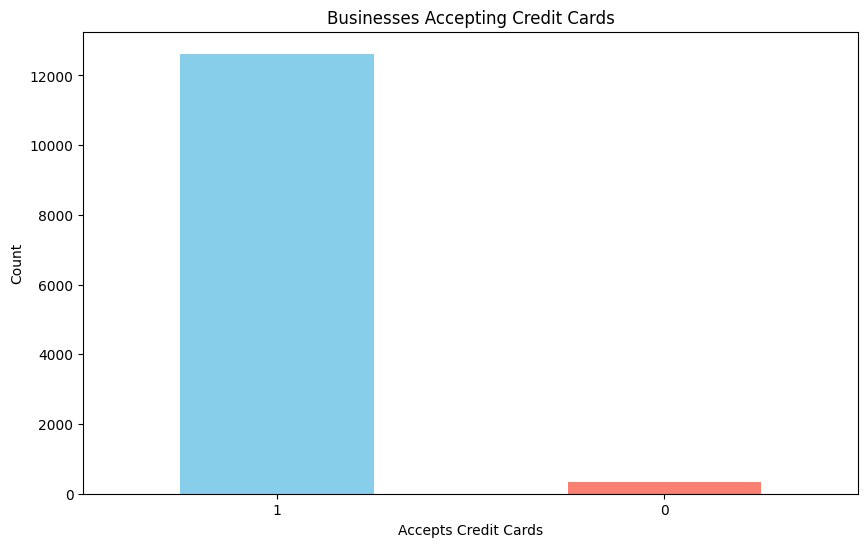

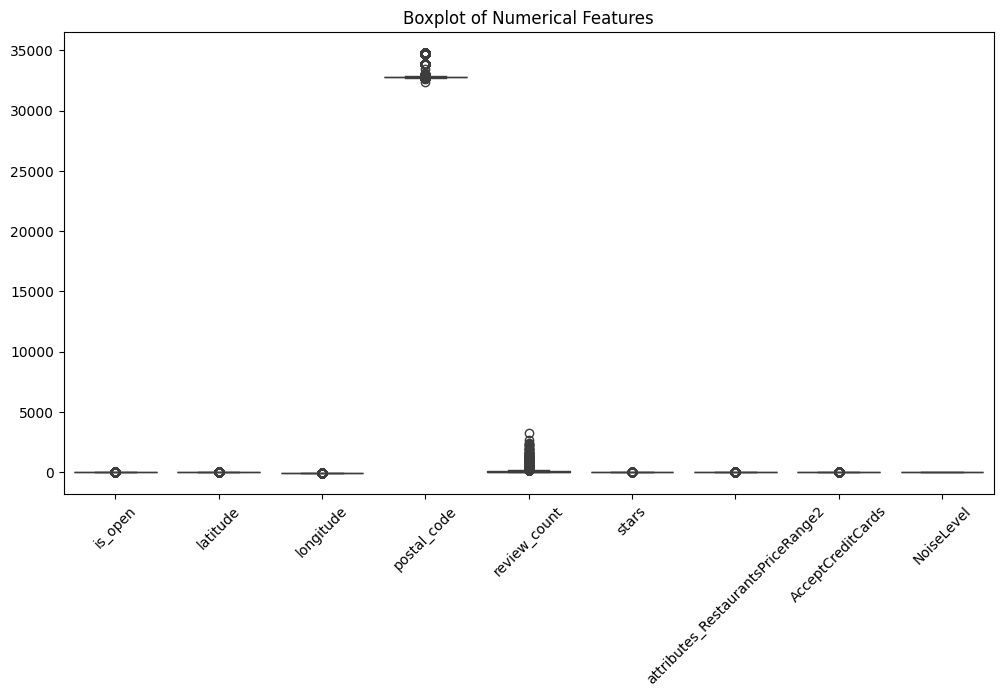

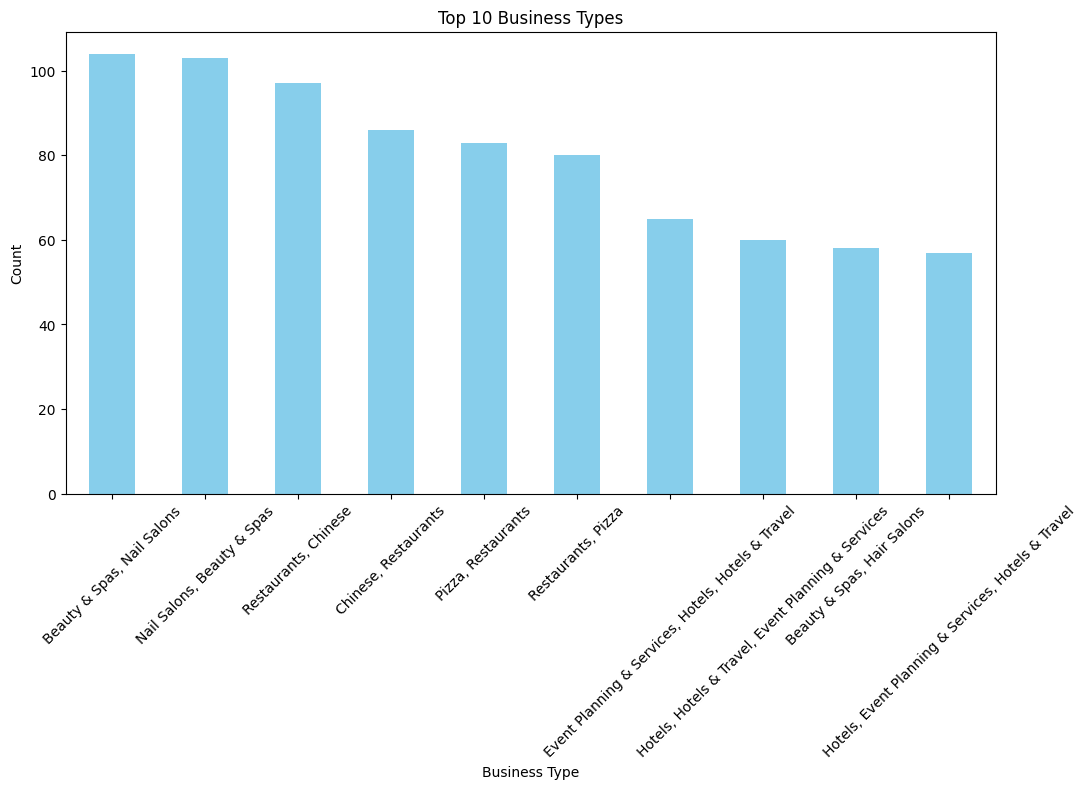

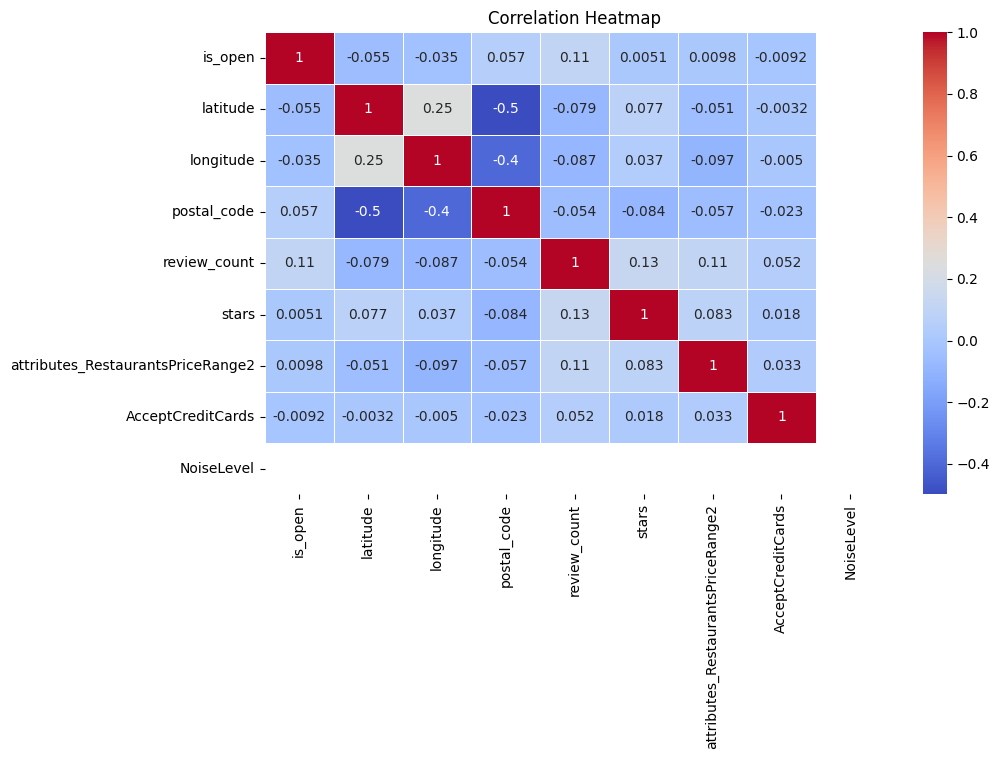

In [70]:

# Data Visualization
plt.figure(figsize=(10, 6))
df2['AcceptCreditCards'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Accepts Credit Cards')
plt.ylabel('Count')
plt.title('Businesses Accepting Credit Cards')
plt.xticks(rotation=0)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df2.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=45)
plt.title('Boxplot of Numerical Features')
plt.show()

plt.figure(figsize=(12, 6))
df2['categories'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Business Type')
plt.ylabel('Count')
plt.title('Top 10 Business Types')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df2.select_dtypes(include=['int64', 'float64']).corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()



# 8. Save the cleaned data to Google Drive (ensure Google Drive is mounted in Colab)

In [71]:
#(1 pt) Mount your Google Drive.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#9 Save the cleaned data

In [73]:
# Save the DataFrame df as a CSV file named ‘fl_business_copy.csv’ in your Google Drive.
df2.to_csv('/content/drive/MyDrive/Colab Notebooks/fl_business_copy2.csv', index=False)